In [1]:
import argparse
import imutils
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display_img(img):
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
def detect_contour(img):
    mx_up=img.shape[0]
    mx_lt=img.shape[1]
    mx_rt=0
    mx_dn=0
    for j in range (img.shape[0]):
        g=0
        f=0
        for k in range (img.shape[1]):
            if(img[j,k]==255):
                f+=1
        g=f
        f=0
        for k in range (img.shape[1]):
            if(img[j,k]==255):
                f+=1
                if (f==1 and k<mx_lt):
                    mx_lt=k
                if (f==g and k>mx_rt):
                    mx_rt=k

    for j in range (img.shape[1]):
        g=0
        f=0
        for k in range (img.shape[0]):
            if(img[k,j]==255):
                f+=1
        g=f
        f=0
        for k in range (img.shape[0]):
            if(img[k,j]==255):
                f+=1
                if (f==1 and k<mx_up):
                    mx_up=k
                if (f==g and k>mx_dn):
                    mx_dn=k
    mx_lt-=1
    mx_dn+=2
    mx_rt+=2
    mx_up-=1
    return img[mx_up:mx_dn,mx_lt:mx_rt]

In [6]:
#img = cv2.imread('opncv/DATA/test_16.jpg',0)

In [ ]:
img = cv2.imread('dataset_new\Training\Defect-free\DF (1).jpg',0)
img = cv2.equalizeHist(img)
med_val = np.median(img)
blurred_img = cv2.blur(img,ksize=(1,1))
lower = int(max(0, 0.1* med_val))
upper = int(min(255,1.9 * med_val))
edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper)
cnts = cv2.findContours(edges, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
x,y=img.shape
external_contours = np.zeros((x,y,3))
for c in cnts:
    M = cv2.moments(c)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv2.drawContours(external_contours, [c], -1, (255, 255, 255), 2)
        #cv2.circle(external_contours, (cX, cY), 2, (255,0,0), -1)
        
display_img(img)
display_img(external_contours)

# Camera

In [4]:
import cv2 
import numpy as np
import imutils

# Capture the frame
cap = cv2.VideoCapture(4)#, cv2.CAP_DSHOW)

while True:
    ret, img_o = cap.read()
    name='snapshot.png'
    cv2.imwrite(name, img_o)
    img = cv2.imread(name)
    med_val = np.median(img)
    blurred_img = cv2.blur(img,ksize=(3,3))
    lower = int(max(0, 0.1* med_val))
    upper = int(min(255,1.9 * med_val))
    edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper)
    cnts = cv2.findContours(edges, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    x,y,z=img.shape
    external_contours = np.zeros((x,y))
    external_contours_centres = np.zeros((x,y,z))
    for c in cnts:
        M = cv2.moments(c)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.drawContours(external_contours, [c], -1, (255, 255, 255), 1)
            cv2.drawContours(external_contours_centres, [c], -1, (255,255,255), 1)
            cv2.circle(external_contours_centres, (cX, cY), 3, (0,0,255), -1)
    
    cv2.imshow('original1',img_o)
    cv2.imshow('processed1',external_contours)
    cv2.imshow('processed2', external_contours_centres)
    
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

In [1]:
import cv2 
import numpy as np
import imutils

def contour(img):
    med_val = np.median(img)
    blurred_img = cv2.blur(img,ksize=(3,3))
    lower = int(max(0, 0.1* med_val))
    upper = int(min(255,1.9 * med_val))
    edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper)
    cnts = cv2.findContours(edges, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    x,y,z=img.shape
    external_contours = np.zeros((x,y,z))
    for c in cnts:
        M = cv2.moments(c)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.drawContours(external_contours, [c], -1, (255, 255, 255), 1)
            cv2.circle(external_contours, (cX, cY), 3, (0,0,255), -1)
    return external_contours
def find(full,face):
    height, width,channels = face.shape
    methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
    m=methods[0]
    full_copy = full.copy()
    method = eval(m)
    res = cv2.matchTemplate(full_copy,face,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + width, top_left[1] + height)
    top_right = (top_left[0] + width, top_left[1])
    bottom_left = (top_left[0], top_left[1] + height)
    cv2.rectangle(full_copy,top_left, bottom_right, (255,0,0), 3)
    return (top_left[1],bottom_left[1],top_left[0],top_right[0],full_copy)

def crop(img,img1):
    if(len(img.shape)==3):
        x,y,z=img1.shape
        img2 = np.full((3*x,3*y,z), 0, dtype=np.uint8)
        x0=img1.shape[0]
        x1=2*img1.shape[0]
        y0=img1.shape[1]
        y1=2*img1.shape[1]
        img2[x0:x1,y0:y1,:]=img1
    if(len(img.shape)==2):
        x,y=img1.shape
        img2 = np.full((3*x,3*y), 0, dtype=np.uint8)
        x0=img1.shape[0]
        x1=2*img1.shape[0]
        y0=img1.shape[1]
        y1=2*img1.shape[1]
        img2[x0:x1,y0:y1]=img1
    # p0,p1,q0,q1,img0=find(img2,img)
    p0,p1,q0,q1=488,968,588,1228
    #display_img(img0)
    if(p0>x0):
        down=True
        a0=p0
        a1=x1
    else:
        down=False
        a1=p1
        a0=x0

    if(q0>y0):
        left=False
        b0=q0
        b1=y1
    else:
        left=True
        b1=q1
        b0=y0
    img3=img2[a0:a1,b0:b1,:]
    if(left==False and down == False):
        img4=img[img.shape[0]-img3.shape[0]:,:img3.shape[1],:]
    elif(left==False and down == True):
        img4=img[:img3.shape[0],:img3.shape[1],:]
    elif(left==True and down == False):
        img4=img[:img3.shape[0],img.shape[1]-img3.shape[1]:,:]
    elif(left==True and down == True):
        img4=img[img.shape[0]-img3.shape[0]:,img.shape[1]-img3.shape[1]:,:]
    return (img4,img3)

print('0')
cap = cv2.VideoCapture(2)
print('1')
cap1 = cv2.VideoCapture(4)
print('2')

while True:
    ret, img_o = cap.read()
    #img_o = cv2.flip(img_o, 1)
    cv2.imwrite('snapshot.png', img_o)
    img = cv2.imread('snapshot.png')
    img = img_o
    
    ret1, img_o1 = cap1.read()
    cv2.imwrite('snapshot1.png', img_o1)
    img1 = cv2.imread('snapshot1.png')
    img1 = img_o1
    img3,img4=crop(img1,img)
    
    cv2.imwrite('snapshot3.png', img3)
    cv2.imwrite('snapshot4.png', img4)
    
    cv2.namedWindow("original1", cv2.WINDOW_NORMAL)        
    cv2.resizeWindow("original1", 630, 455)
    cv2.namedWindow("original2", cv2.WINDOW_NORMAL)        
    cv2.resizeWindow("original2", 630, 455)
    cv2.namedWindow("processed1", cv2.WINDOW_NORMAL)        
    cv2.resizeWindow("processed1", 630, 455)
    cv2.namedWindow("processed2", cv2.WINDOW_NORMAL)        
    cv2.resizeWindow("processed2", 630, 455)

    cv2.imshow('original1',img1)
    cv2.imshow('processed1',(img3))
    cv2.imshow('original2',img)
    cv2.imshow('processed2',(img4))

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cap1.release()
cv2.destroyAllWindows()

0
1
2


In [ ]:
import cv2 
import numpy as np
import imutils

def contour(img):
    med_val = np.median(img)
    blurred_img = cv2.blur(img,ksize=(3,3))
    lower = int(max(0, 0.1* med_val))
    upper = int(min(255,1.9 * med_val))
    edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper)
    cnts = cv2.findContours(edges, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    x,y,z=img.shape
    external_contours = np.zeros((x,y,z))
    for c in cnts:
        M = cv2.moments(c)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.drawContours(external_contours, [c], -1, (255, 255, 255), 1)
            cv2.circle(external_contours, (cX, cY), 3, (0,0,255), -1)
    return external_contours
def find(full,face):
    height, width,channels = face.shape
    methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
    m=methods[0]
    full_copy = full.copy()
    method = eval(m)
    res = cv2.matchTemplate(full_copy,face,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + width, top_left[1] + height)
    top_right = (top_left[0] + width, top_left[1])
    bottom_left = (top_left[0], top_left[1] + height)
    cv2.rectangle(full_copy,top_left, bottom_right, (255,0,0), 3)
    return (top_left[1],bottom_left[1],top_left[0],top_right[0],full_copy)

def crop(img,img1):
    if(len(img.shape)==3):
        x,y,z=img1.shape
        img2 = np.full((3*x,3*y,z), 0, dtype=np.uint8)
        x0=img1.shape[0]
        x1=2*img1.shape[0]
        y0=img1.shape[1]
        y1=2*img1.shape[1]
        img2[x0:x1,y0:y1,:]=img1
    if(len(img.shape)==2):
        x,y=img1.shape
        img2 = np.full((3*x,3*y), 0, dtype=np.uint8)
        x0=img1.shape[0]
        x1=2*img1.shape[0]
        y0=img1.shape[1]
        y1=2*img1.shape[1]
        img2[x0:x1,y0:y1]=img1
    p0,p1,q0,q1,img0=find(img2,img)
    # p0,p1,q0,q1=488,968,588,1228
    print(p0,p1,q0,q1)
    #display_img(img0)
    if(p0>x0):
        down=True
        a0=p0
        a1=x1
    else:
        down=False
        a1=p1
        a0=x0

    if(q0>y0):
        left=False
        b0=q0
        b1=y1
    else:
        left=True
        b1=q1
        b0=y0
    img3=img2[a0:a1,b0:b1,:]
    if(left==False and down == False):
        img4=img[img.shape[0]-img3.shape[0]:,:img3.shape[1],:]
    elif(left==False and down == True):
        img4=img[:img3.shape[0],:img3.shape[1],:]
    elif(left==True and down == False):
        img4=img[:img3.shape[0],img.shape[1]-img3.shape[1]:,:]
    elif(left==True and down == True):
        img4=img[img.shape[0]-img3.shape[0]:,img.shape[1]-img3.shape[1]:,:]
    return (img3,img4)

img = cv2.imread('snapshot.png')

img1 = cv2.imread('snapshot1.png')

img3,img4=crop(img1,img)

cv2.namedWindow("original1", cv2.WINDOW_NORMAL)        
cv2.resizeWindow("original1", 630, 455)
cv2.namedWindow("original2", cv2.WINDOW_NORMAL)        
cv2.resizeWindow("original2", 630, 455)
cv2.namedWindow("processed1", cv2.WINDOW_NORMAL)        
cv2.resizeWindow("processed1", 630, 455)
cv2.namedWindow("processed2", cv2.WINDOW_NORMAL)        
cv2.resizeWindow("processed2", 630, 455)

cv2.imshow('original1',img3)
cv2.imshow('processed1',contour(img3))
cv2.imshow('original2',img4)
cv2.imshow('processed2',contour(img4))

cv2.waitKey(0)
cv2.destroyAllWindows()
# 488 968 588 1228

488 968 588 1228


In [4]:
import cv2 
import numpy as np
import imutils
from numba import jit, cuda

def contour(img):
    med_val = np.median(img)
    blurred_img = cv2.blur(img,ksize=(3,3))
    lower = int(max(0, 0.1* med_val))
    upper = int(min(255,1.9 * med_val))
    edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper)
    cnts = cv2.findContours(edges, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    x,y,z=img.shape
    external_contours = np.zeros((x,y,z))
    for c in cnts:
        M = cv2.moments(c)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.drawContours(external_contours, [c], -1, (255, 255, 255), 1)
            cv2.circle(external_contours, (cX, cY), 3, (0,0,255), -1)
    return external_contours



img = cv2.imread('snapshot3.png')

img1 = cv2.imread('snapshot4.png')


cv2.namedWindow("original1", cv2.WINDOW_NORMAL)        
cv2.resizeWindow("original1", 630, 455)
cv2.namedWindow("processed1", cv2.WINDOW_NORMAL)        
cv2.resizeWindow("processed1", 630, 455)
cv2.namedWindow("processed2", cv2.WINDOW_NORMAL)        
cv2.resizeWindow("processed2", 630, 455)
cv2.namedWindow("original2", cv2.WINDOW_NORMAL)        
cv2.resizeWindow("original2", 630, 455)

cv2.imshow('original1',img_o)
cv2.imshow('processed1',contour(img))
cv2.imshow('original2',img_o1)
cv2.imshow('processed2',contour(img1))

cv2.waitKey(0)
#cap.release()
cv2.destroyAllWindows()

In [5]:
import cv2 
import numpy as np
import imutils
from numba import jit, cuda
from timeit import default_timer as timer

def find(full,face):
    height, width,channels = face.shape
    methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
    m=methods[4]
    full_copy = full.copy()
    method = eval(m)
    res = cv2.matchTemplate(full_copy,face,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + width, top_left[1] + height)
    cv2.rectangle(full_copy,top_left, bottom_right, (0,0,255), 1)
    return full_copy,top_left,bottom_right
    
@jit(target_backend='cuda')  
def detect_contour(img):
    mx_up=img.shape[0]
    mx_lt=img.shape[1]
    mx_rt=0
    mx_dn=0
    for j in range (img.shape[0]):
        g=0
        f=0
        for k in range (img.shape[1]):
            if(img[j,k]==255):
                f+=1
        g=f
        f=0
        for k in range (img.shape[1]):
            if(img[j,k]==255):
                f+=1
                if (f==1 and k<mx_lt):
                    mx_lt=k
                if (f==g and k>mx_rt):
                    mx_rt=k

    for j in range (img.shape[1]):
        g=0
        f=0
        for k in range (img.shape[0]):
            if(img[k,j]==255):
                f+=1
        g=f
        f=0
        for k in range (img.shape[0]):
            if(img[k,j]==255):
                f+=1
                if (f==1 and k<mx_up):
                    mx_up=k
                if (f==g and k>mx_dn):
                    mx_dn=k
    mx_lt-=1
    mx_dn+=2
    mx_rt+=2
    mx_up-=1
    return img[mx_up:mx_dn,mx_lt:mx_rt]

def ssim(img1, img2):
    C1 = (0.01 * 255)**2
    C2 = (0.03 * 255)**2

    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    kernel = cv2.getGaussianKernel(11, 1.5)
    window = np.outer(kernel, kernel.transpose())

    mu1 = cv2.filter2D(img1, -1, window)[5:-5, 5:-5]  # valid
    mu2 = cv2.filter2D(img2, -1, window)[5:-5, 5:-5]
    mu1_sq = mu1**2
    mu2_sq = mu2**2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = cv2.filter2D(img1**2, -1, window)[5:-5, 5:-5] - mu1_sq
    sigma2_sq = cv2.filter2D(img2**2, -1, window)[5:-5, 5:-5] - mu2_sq
    sigma12 = cv2.filter2D(img1 * img2, -1, window)[5:-5, 5:-5] - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) *
                                                            (sigma1_sq + sigma2_sq + C2))
    return ssim_map.mean()

def calculate_ssim(img1, img2):
    if(len(img1.shape)<3):
        if ((img1.shape[0])<(img2.shape[0])):
            X=img2.shape[0]
            Y=img1.shape[1]
            img3 = np.full((X,Y), 0, dtype=np.uint8)
            x0=int((X/2)-(img1.shape[0]/2))
            x1=int((X/2)+(img1.shape[0]/2))
            y0=int((Y/2)-(img1.shape[1]/2))
            y1=int((Y/2)+(img1.shape[1]/2))
            img3[x0:x1,y0:y1]=img1
            img1=img3
            
        if ((img1.shape[0])>(img2.shape[0])):
            X=img1.shape[0]
            Y=img2.shape[1]
            img3 = np.full((X,Y), 0, dtype=np.uint8)
            x0=int((X/2)-(img2.shape[0]/2))
            x1=int((X/2)+(img2.shape[0]/2))
            y0=int((Y/2)-(img2.shape[1]/2))
            y1=int((Y/2)+(img2.shape[1]/2))
            img3[x0:x1,y0:y1]=img2
            img2=img3
            
        if ((img1.shape[1])<(img2.shape[1])):
            X=img1.shape[0]
            Y=img2.shape[1]
            img3 = np.full((X,Y), 0, dtype=np.uint8)
            x0=int((X/2)-(img1.shape[0]/2))
            x1=int((X/2)+(img1.shape[0]/2))
            y0=int((Y/2)-(img1.shape[1]/2))
            y1=int((Y/2)+(img1.shape[1]/2))
            img3[x0:x1,y0:y1]=img1
            img1=img3
            
        if ((img1.shape[1])>(img2.shape[1])):
            X=img2.shape[0]
            Y=img1.shape[1]
            img3 = np.full((X,Y), 0, dtype=np.uint8)
            x0=int((X/2)-(img2.shape[0]/2))
            x1=int((X/2)+(img2.shape[0]/2))
            y0=int((Y/2)-(img2.shape[1]/2))
            y1=int((Y/2)+(img2.shape[1]/2))
            img3[x0:x1,y0:y1]=img2
            img2=img3
    
    elif(len(img1.shape)==3):
        if ((img1.shape[0])<(img2.shape[0])):
            X=img2.shape[0]
            Y=img1.shape[1]
            img3 = np.full((X,Y,3), 0, dtype=np.uint8)
            x0=int((X/2)-(img1.shape[0]/2))
            x1=int((X/2)+(img1.shape[0]/2))
            y0=int((Y/2)-(img1.shape[1]/2))
            y1=int((Y/2)+(img1.shape[1]/2))
            img3[x0:x1,y0:y1,:]=img1
            img1=img3
            
        if ((img1.shape[0])>(img2.shape[0])):
            X=img1.shape[0]
            Y=img2.shape[1]
            img3 = np.full((X,Y,3), 0, dtype=np.uint8)
            x0=int((X/2)-(img2.shape[0]/2))
            x1=int((X/2)+(img2.shape[0]/2))
            y0=int((Y/2)-(img2.shape[1]/2))
            y1=int((Y/2)+(img2.shape[1]/2))
            img3[x0:x1,y0:y1,:]=img2
            img2=img3
            
        if ((img1.shape[1])<(img2.shape[1])):
            X=img1.shape[0]
            Y=img2.shape[1]
            img3 = np.full((X,Y,3), 0, dtype=np.uint8)
            x0=int((X/2)-(img1.shape[0]/2))
            x1=int((X/2)+(img1.shape[0]/2))
            y0=int((Y/2)-(img1.shape[1]/2))
            y1=int((Y/2)+(img1.shape[1]/2))
            img3[x0:x1,y0:y1,:]=img1
            img1=img3
            
        if ((img1.shape[1])>(img2.shape[1])):
            X=img2.shape[0]
            Y=img1.shape[1]
            img3 = np.full((X,Y,3), 0, dtype=np.uint8)
            x0=int((X/2)-(img2.shape[0]/2))
            x1=int((X/2)+(img2.shape[0]/2))
            y0=int((Y/2)-(img2.shape[1]/2))
            y1=int((Y/2)+(img2.shape[1]/2))
            img3[x0:x1,y0:y1,:]=img2
            img2=img3
            
    if not img1.shape == img2.shape:
        raise ValueError('Input images must have the same dimensions.')
    if img1.ndim == 2:
        return ssim(img1, img2)
    elif img1.ndim == 3:
        if img1.shape[2] == 3:
            ssims = []
            for i in range(3):
                ssims.append(ssim(img1, img2))
            return np.array(ssims).mean()
        elif img1.shape[2] == 1:
            return ssim(np.squeeze(img1), np.squeeze(img2))
    else:
        raise ValueError('Wrong input image dimensions.')

def contour(img,a):
    med_val = np.median(img)
    blurred_img = cv2.blur(img,ksize=(3,3))
    lower = int(max(0, 0.1* med_val))
    upper = int(min(255,1.9 * med_val))
    edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper)
    cnts = cv2.findContours(edges, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    if(len(img.shape)==3):
        x,y,z=img.shape
        external_contours = np.zeros((x,y,z))
    else:
        x,y=img.shape
        external_contours = np.zeros((x,y,3))
    external_contours_centres = np.zeros((x,y))
    i=0
    for c in cnts:
        M = cv2.moments(c)
        if M["m00"] != 0:
            i+=1
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.drawContours(external_contours, [c], -1, (255, 255, 255), 1)
            if(i==a):
                cv2.drawContours(external_contours_centres, [c], -1, (255,255,255), 1)
    print(i)
    return external_contours,external_contours_centres

def contour1(img):
    med_val = np.median(img)
    blurred_img = cv2.blur(img,ksize=(3,3))
    lower = int(max(0, 0.1* med_val))
    upper = int(min(255,1.9 * med_val))
    edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper)
    cnts = cv2.findContours(edges, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    if(len(img.shape)==3):
        x,y,z=img.shape
        external_contours = np.zeros((x,y,z))
    else:
        x,y=img.shape
        external_contours = np.zeros((x,y,3))
    external_contours_centres = np.zeros((x,y))
    for c in cnts:
        M = cv2.moments(c)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.drawContours(external_contours, [c], -1, (255, 255, 255), 1)
    return external_contours

def sortSecond(val):
    return val[1]
                
def find_cntr(a):
    """
    cap = cv2.VideoCapture(1)

    ret, img_o = cap.read()
    cv2.imwrite('snapshot.png', img_o)
    img = cv2.imread('snapshot.png')
    """
    path='snapshot3.png'
    path1='snapshot4.png'
    
    img_o=cv2.imread(path)
    img = cv2.imread(path)
    
    img_o1=cv2.imread(path1)
    img1 = cv2.imread(path1)
    external_contours,external_contours_centres=contour(img,a)
    external_contours1=contour1(img1)
    
    cv2.namedWindow("original", cv2.WINDOW_NORMAL)        
    cv2.resizeWindow("original", 630, 455)
    cv2.namedWindow("processed1", cv2.WINDOW_NORMAL)        
    cv2.resizeWindow("processed1", 630, 455)
    cv2.namedWindow("processed2", cv2.WINDOW_NORMAL)        
    cv2.resizeWindow("processed2", 630, 455)
    # cv2.namedWindow("processed3", cv2.WINDOW_NORMAL)        
    # cv2.resizeWindow("processed3", 630, 455)

    cv2.imwrite('original.jpg',external_contours)
    cv2.imwrite('original1.jpg',external_contours1)
    cv2.imwrite('match.png',detect_contour(external_contours_centres))
    full = cv2.imread('original.jpg')
    full1 = cv2.imread('original1.jpg')
    face = cv2.imread('match.png')

    match,tl,br=find(full,face)#(42, 74) (283, 472)
    cv2.rectangle(img,tl, br, (0,0,255), 1)
    cv2.rectangle(img_o,tl, br, (0,0,255), 1)
    cv2.rectangle(full,tl, br, (0,0,255), 1)
    dx=br[0]-tl[0]
    
    # smx=[[]]
    # for i in range(dx,full[tl[1]:br[1],:,:].shape[1]):
    #     smx.append((i-dx,calculate_ssim(full1[tl[1]:br[1],i-dx:i,:],full[tl[1]:br[1],tl[0]:br[0],:])))
    # smx=smx[1:]
    # smx.sort(key=sortSecond,reverse=True)
    # print(smx[0][0])
    # tl1=(smx[0][0],0)
    # br1=(smx[0][0]+dx,br[1]-tl[1])

    match1,tl1,br1=find(img1,img[tl[1]:br[1],tl[0]:br[0],:])
    cv2.rectangle(img_o1[tl[1]:br[1],:,:],tl1, br1, (0,0,255), 1)
    cv2.rectangle(img1[tl[1]:br[1],:,:],tl1, br1, (0,0,255), 1)
    cv2.rectangle(full1[tl[1]:br[1],:,:],tl1, br1, (0,0,255), 1)
    

    cv2.imshow('original',external_contours_centres)
    cv2.imshow('processed1',img)
    cv2.imshow('processed2', img1)

    cv2.waitKey(0)
    #cap.release()
    cv2.destroyAllWindows()

In [6]:
find_cntr(9)

90


In [ ]:
# start = timer()
for i in range(1,87):
    print(i)
    find_cntr(i)
# print(timer()-start)

1
87
2
87
3
87
4
87
5
87
6
87
7
87
8
87
9
87


In [ ]:
53
92
176

In [23]:
def depth_map(imgL, imgR):
    """ Depth map calculation. Works with SGBM and WLS. Need rectified images, returns depth map ( left to right disparity ) """
    # SGBM Parameters -----------------
    window_size = 3  # wsize default 3; 5; 7 for SGBM reduced size image; 15 for SGBM full size image (1300px and above); 5 Works nicely

    left_matcher = cv2.StereoSGBM_create(
        minDisparity=-1,
        numDisparities=1*16,  # max_disp has to be dividable by 16 f. E. HH 192, 256
        blockSize=window_size,
        P1=8 * 3 * window_size,
        # wsize default 3; 5; 7 for SGBM reduced size image; 15 for SGBM full size image (1300px and above); 5 Works nicely
        P2=32 * 3 * window_size,
        disp12MaxDiff=12,
        uniquenessRatio=10,
        speckleWindowSize=50,
        speckleRange=32,
        preFilterCap=63,
        mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
    )
    right_matcher = cv2.ximgproc.createRightMatcher(left_matcher)
    # FILTER Parameters
    lmbda = 8000
    sigma = 1.3
    visual_multiplier = 6

    wls_filter = cv2.ximgproc.createDisparityWLSFilter(matcher_left=left_matcher)
    wls_filter.setLambda(lmbda)

    wls_filter.setSigmaColor(sigma)
    displ = left_matcher.compute(imgL, imgR)  # .astype(np.float32)/16
    dispr = right_matcher.compute(imgR, imgL)  # .astype(np.float32)/16
    displ = np.int16(displ)
    dispr = np.int16(dispr)
    filteredImg = wls_filter.filter(displ, imgL, None, dispr)  # important to put "imgL" here!!!

    filteredImg = cv2.normalize(src=filteredImg, dst=filteredImg, beta=0, alpha=255, norm_type=cv2.NORM_MINMAX);
    filteredImg = np.uint8(filteredImg)

    return filteredImg

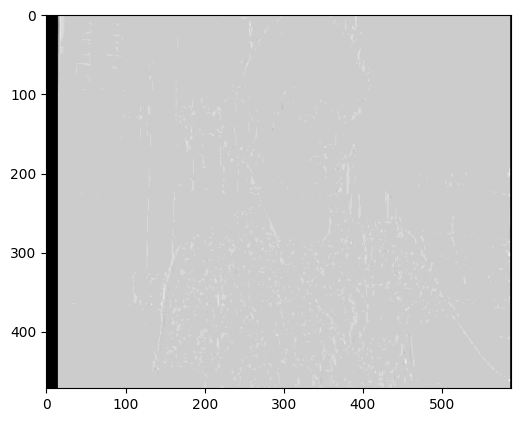

In [24]:
path='snapshot3.png'
path1='snapshot4.png'

imgL = cv2.imread(path)
imgR = cv2.imread(path)

display_img(depth_map(imgL, imgR))